Model substrate concentrations over time: [10.0, 8.689194161184558, 7.8684984832175155, 7.547002678597621, 6.909445332040923, 5.05211139306314, 3.9630088914715675, 3.583711879435872, 3.2622909151389536, 2.9539410673171753]
R-squared: 0.9989
RMSE: 0.0809


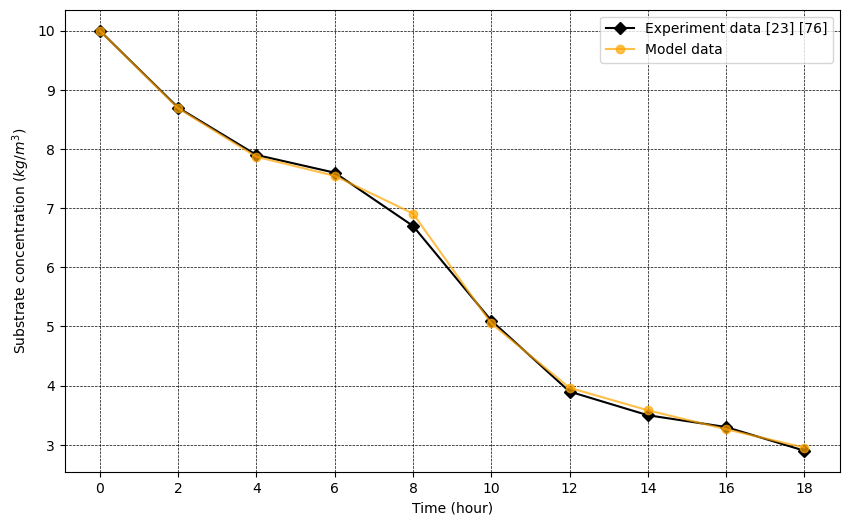

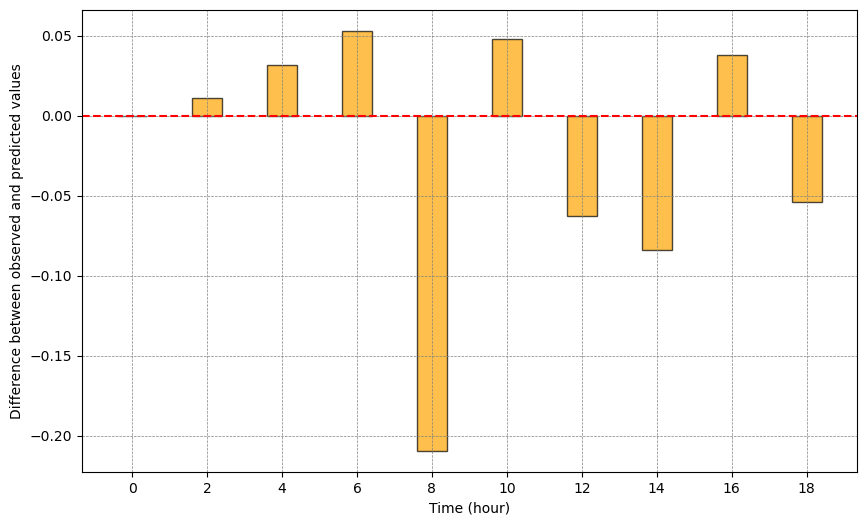

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Substrate concentration as a function of t
def Classical_monod(S, mu_max, X_0, Y_xs, S_0, K_s, t):
    left_side = mu_max * (X_0 + Y_xs * S_0) * t
    right_side = (X_0 + Y_xs * (S_0 + K_s)) * np.log((X_0 + Y_xs * (S_0 - S)) / X_0) - K_s * Y_xs * np.log(S / S_0)
    return left_side - right_side

# Parameter values
mu_max = 0.40       # Maximum specific growth rate (per hour)
X_0 = 0.05          # Initial cellmass concentration
Yield = np.array([0.015, 0.025, 0.040, 0.070, 0.100, 0.100, 0.130, 0.200, 0.310, 0.480]) # Yield coefficient (cellmass per substrate)
S_0 = 10.0         # Initial substrate concentration
K_s = 5.51          # Saturation constant
Time = np.array([0,2,4,6,8,10,12,14,16,18])  # Time points
Substrate_concentration = np.array([10.0, 8.7, 7.9, 7.6, 6.7, 5.1, 3.9, 3.5, 3.3, 2.9]) #Experiment value

# Initial guess for Substrate concentration
initial_guess = 10

# Solving the equation for Substrate concentration at each time step
S_solutions = []

for Y_xs,t in zip(Yield,Time):
    S_solution = fsolve(Classical_monod, initial_guess, args=(mu_max, X_0, Y_xs, S_0, K_s, t))
    S_solutions.append(S_solution[0])  

# Print model predictions
print("Model substrate concentrations over time:", S_solutions)

# Calculate residuals
residuals = Substrate_concentration - S_solutions

# Perform regression analysis
r2 = r2_score(Substrate_concentration, S_solutions)
rmse = np.sqrt(mean_squared_error(Substrate_concentration, S_solutions))

# Print regression metrics
print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Plot experimental vs. model data
plt.figure(figsize=(10, 6))
plt.plot(Time, Substrate_concentration, label = 'Experiment data [23] [76]', color = 'black', marker='D', alpha=1)   
plt.plot(Time, S_solutions, label = 'Model data', color = 'orange', marker='o', alpha=0.7)
plt.xlabel('Time (hour)')
plt.xticks(Time)
plt.ylabel('Substrate concentration ($kg/m^3$)') 
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5) 
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.bar(Time, residuals, color='orange', edgecolor='black', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Time (hour)')
plt.ylabel('Difference between observed and predicted values')
plt.xticks(Time)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()